<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Extracting Stock Data Using a Web Scraping</h1>


Not all stock data is available via API in this assignment; you will use web-scraping to obtain financial data. You will be quizzed on your results.\
Using beautiful soup we will extract historical share data from a web-page.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Downloading the Webpage Using Requests Library</li>
        <li>Parsing Webpage HTML Using BeautifulSoup</li>
        <li>Extracting Data and Building DataFrame</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [12]:
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
#!mamba install bs4==4.10.0 -y
#!pip install html5lib
#!pip install lxml==4.6.4
#!pip install plotly==5.3.1
!pip install lxml

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

## Using Webscraping to Extract Stock Data Example


First we must use the `request` library to downlaod the webpage, and extract the text. We will extract Netflix stock data <https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html>.


In [10]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

data  = requests.get(url).text

Next we must parse the text into html using `beautiful_soup`


In [ ]:
#soup = BeautifulSoup(data, 'html5lib')
soup = BeautifulSoup(data, 'html.parser')
#soup

Exemplo do início da saída

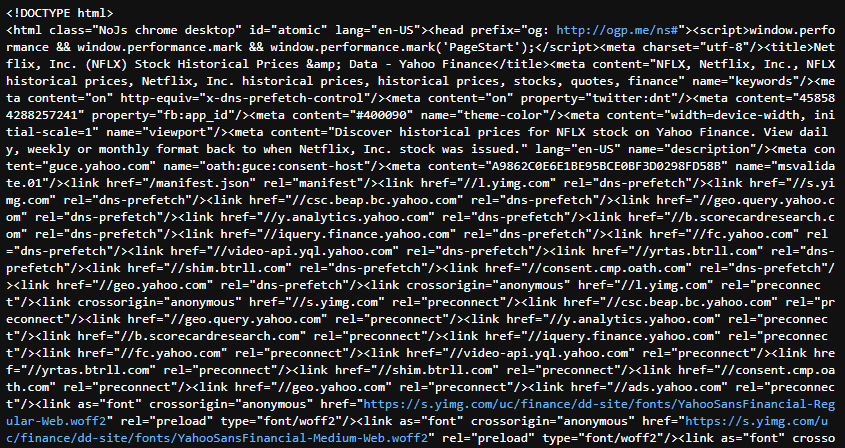

Now we can turn the html table into a pandas dataframe

Para isso podemos olhar o site e verificar quais são as colunas 
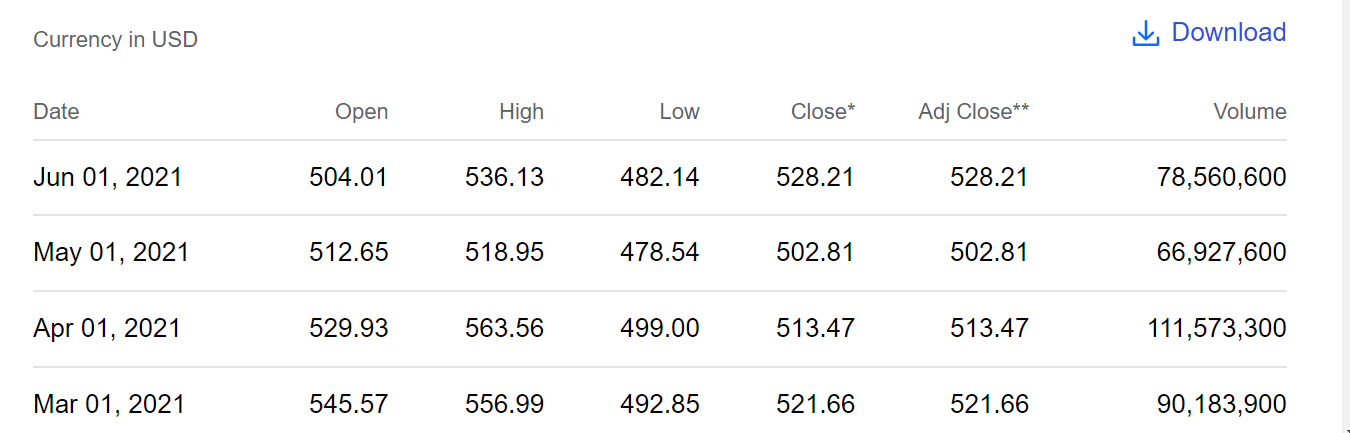


In [17]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    

We can now print out the dataframe


In [18]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


We can also use the pandas `read_html` function using the url


In [19]:
read_html_pandas_data = pd.read_html(url)

Or we can convert the BeautifulSoup object to a string


In [ ]:
read_html_pandas_data = pd.read_html(str(soup))

Beacause there is only one table on the page, we just take the first table in the list returned


In [20]:
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


## Using Webscraping to Extract Stock Data Exercise


Use the `requests` library to download the webpage <https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html>. Save the text of the response as a variable named `html_data`.


In [24]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"

html_data = requests.get(url).text



Parse the html data using `beautiful_soup`.


In [25]:
soup = BeautifulSoup(html_data, "html.parser")

<b>Question 1</b> What is the content of the title attribute:


In [26]:
soup.title

<title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>

Using beautiful soup extract the table with historical share prices and store it into a dataframe named `amazon_data`. The dataframe should have columns Date, Open, High, Low, Close, Adj Close, and Volume. Fill in each variable with the correct data from the list `col`.


In [27]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

Print out the first five rows of the `amazon_data` dataframe you created.


In [28]:
 amazon_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","3,206.20","71,528,900"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","3,256.93","77,556,200"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","3,168.04","90,810,500"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","3,036.15","116,226,100"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","3,148.73","115,899,300"


<b>Question 2</b> What is the name of the columns of the dataframe


In [29]:
 amazon_data.columns
    

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<b>Question 3</b> What is the `Open` of the last row of the amazon_data dataframe?


In [30]:
 amazon_data.Open

0     3,270.00
1     3,188.50
2     3,061.74
3     3,208.00
4     3,489.58
        ...   
56      663.92
57      590.49
58      556.29
59      578.15
60      656.29
Name: Open, Length: 61, dtype: object

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description |
| ----------------- | ------- | ---------- | ------------------ |

```
| 2021-06-09       | 1.2     | Lakshmi Holla|Added URL in question 3 |
```

\| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
\| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
